# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [6]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [8]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# Try loading one file
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_parquet('/content/drive/MyDrive/Asssignements/EDA/data_NYC_Taxi/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [11]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [12]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Asssignements/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe and a sample directory to hold Month wise sample files
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        print(f"Processing {file_name}...") #output the current file name
        file_path = os.path.join(os.getcwd(), file_name)

        # 1. Read the file
        df_file = pd.read_parquet(file_path)

        # 2. Create columns for grouping
        df_file['temp_date'] = df_file['tpep_pickup_datetime'].dt.date
        df_file['temp_hour'] = df_file['tpep_pickup_datetime'].dt.hour

        # 3. Sample 5% from each group DIRECTLY
        sampled_data = df_file.groupby(['temp_date', 'temp_hour']).sample(frac=0.05, random_state=42)

        # 4. Append data to main dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

        # 5. Cleanup temp columns
        sampled_data = sampled_data.drop(columns=['temp_date', 'temp_hour'])
        del df_file, sampled_data

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
df = df.drop(columns=['temp_date', 'temp_hour'])

Processing 2023-1.parquet...
Processing 2023-2.parquet...
Processing 2023-3.parquet...
Processing 2023-4.parquet...
Processing 2023-5.parquet...
Processing 2023-6.parquet...
Processing 2023-7.parquet...
Processing 2023-8.parquet...
Processing 2023-9.parquet...
Processing 2023-10.parquet...
Processing 2023-11.parquet...
Processing 2023-12.parquet...


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [13]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_csv("/content/drive/MyDrive/Asssignements/EDA/data_NYC_Taxi/Sample-Data.csv")

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [14]:
# Load the new data file

df = pd.read_csv('/content/drive/MyDrive/Asssignements/EDA/data_NYC_Taxi/Sample-Data.csv')

In [15]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,0,2,2022-12-31 23:36:04,2022-12-31 23:43:31,1.0,1.69,1.0,N,43,141,...,10.0,1.0,0.5,3.00,0.0,1.0,18.00,2.5,0.0,NaN
1,1,1,2023-01-01 00:59:47,2023-01-01 01:23:42,NaN,0.00,NaN,NaN,68,45,...,35.3,0.0,0.5,0.00,0.0,1.0,39.30,NaN,NaN,NaN
2,2,2,2023-01-01 00:18:34,2023-01-01 00:23:55,1.0,0.99,1.0,N,144,211,...,7.2,1.0,0.5,0.00,0.0,1.0,12.20,2.5,0.0,NaN
3,3,2,2023-01-01 00:32:27,2023-01-01 00:37:01,2.0,0.92,1.0,N,79,107,...,7.2,1.0,0.5,3.05,0.0,1.0,15.25,2.5,0.0,NaN
4,4,1,2023-01-01 00:26:11,2023-01-01 00:40:21,2.0,2.30,1.0,Y,48,238,...,13.5,3.5,0.5,4.60,0.0,1.0,23.10,2.5,0.0,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
 20  Airport_fee            float64
dtypes: float64(13), int64(5), object(3)
memory usage: 303.

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [17]:
df.reset_index(drop=True, inplace=True)
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  Airport_fee            float64
dtypes: float64(13), int64(4), object(3)
memory usage: 289.4+ MB


In [18]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee'],
      dtype='object')

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [19]:
# Combine the two airport fee columns

df['airport_fee_combined'] = df[['airport_fee', 'Airport_fee']].max(axis=1)
df = df.drop(['airport_fee', 'Airport_fee'], axis=1)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [20]:
# check where values of fare amount are negative

df[df['fare_amount'] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined


Did you notice something different in the `RatecodeID` column for above records?

In [21]:
# Analyse RatecodeID for the negative fare amounts
df[df['fare_amount'] < 0]['RatecodeID']


,RatecodeID


In [22]:
# Find which columns have negative values
negative_value_columns = []
for col in df.select_dtypes(include=np.number).columns:
    if (df[col] < 0). any():
        negative_value_columns.append(col)

if negative_value_columns:
    print("Columns with negative values:", negative_value_columns)
else:
    print("No columns found with negative values.")



Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_combined']


In [23]:
# fix these negative values
for col in negative_value_columns:
    df[col] = df[col].abs()


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [24]:
# Find the proportion of missing values in each column
missing_values = df.isnull().sum() / len(df)
print(missing_values)


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034255
trip_distance            0.000000
RatecodeID               0.034255
store_and_fwd_flag       0.034255
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034255
airport_fee_combined     0.034255
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [25]:
# Display the rows with null values
df[df.isnull().any(axis=1)]
# Impute NaN values in 'passenger_count'
df['passenger_count'] = df['passenger_count'].fillna(1)


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [26]:
# Fix missing values in 'RatecodeID'
df[df['RatecodeID'].isnull()]
df['RatecodeID'] = df['RatecodeID'].fillna(1)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [27]:
# handle null values in congestion_surcharge
df[df['congestion_surcharge'].isnull()]
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)




Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [28]:
# Handle any remaining missing values
df[df['store_and_fwd_flag'].isnull()]
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)
df['airport_fee_combined'].fillna(0, inplace=True)
missing_values = df.isnull().sum() / len(df)
print(missing_values)



VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee_combined     0.0
dtype: float64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [29]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
count,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06
mean,1.735933e+00,1.357067e+00,3.966358e+00,1.626876e+00,1.652374e+02,1.640294e+02,1.163460e+00,1.990621e+01,1.583209e+00,4.952900e-01,3.557074e+00,5.998480e-01,9.991024e-01,2.898547e+01,2.314839e+00,1.388294e-01
std,4.465162e-01,8.800232e-01,1.713594e+02,7.353538e+00,6.398685e+01,6.987281e+01,5.077709e-01,1.836839e+01,1.830703e+00,4.885372e-02,4.085411e+00,2.186720e+00,2.772183e-02,2.295037e+01,6.546899e-01,4.587245e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.250000e+01,2.500000e+00,5.000000e-01,4.450000e+00,0.000000e+00,1.000000e+00,3.100000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,1.439264e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.116700e+03,9.638000e+01,5.750000e+00,4.100000e+02,8.355000e+01,1.000000e+00,1.120700e+03,2.500000e+00,1.750000e+00


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

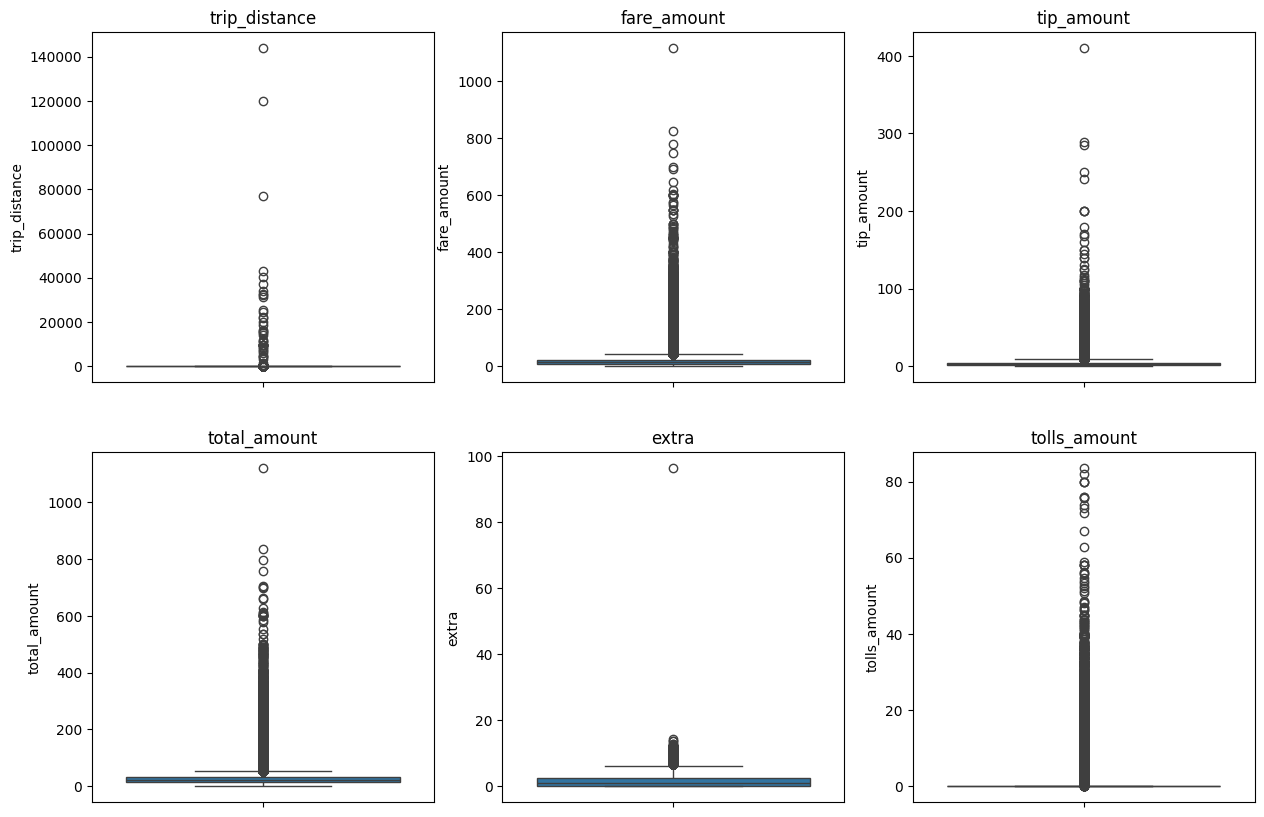

In [30]:
cols_to_check = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'extra', 'tolls_amount']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.show()

In [31]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]


In [32]:
# Continue with outlier handling
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

df = df[df['trip_distance'] <= 250]

df = df[df['payment_type'] != 0]

In [33]:
# Do any columns need standardising?
cols_to_scale = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount']
for col in cols_to_scale:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [34]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee_combined']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [35]:
# Convert datetime columns to datetime data type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1831293 entries, 0 to 1896399
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee_combined   floa

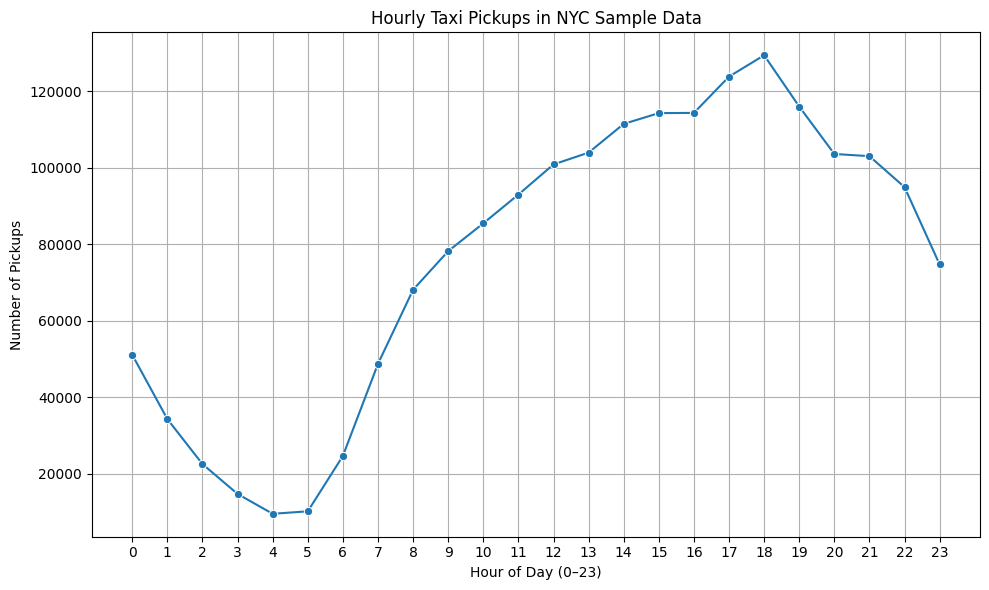

In [36]:
# Find and show the hourly trends in taxi pickups
df['hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_trend = df.groupby('hour').size().reset_index(name='pickup_count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_trend, x='hour', y='pickup_count', marker='o')
plt.title('Hourly Taxi Pickups in NYC Sample Data')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


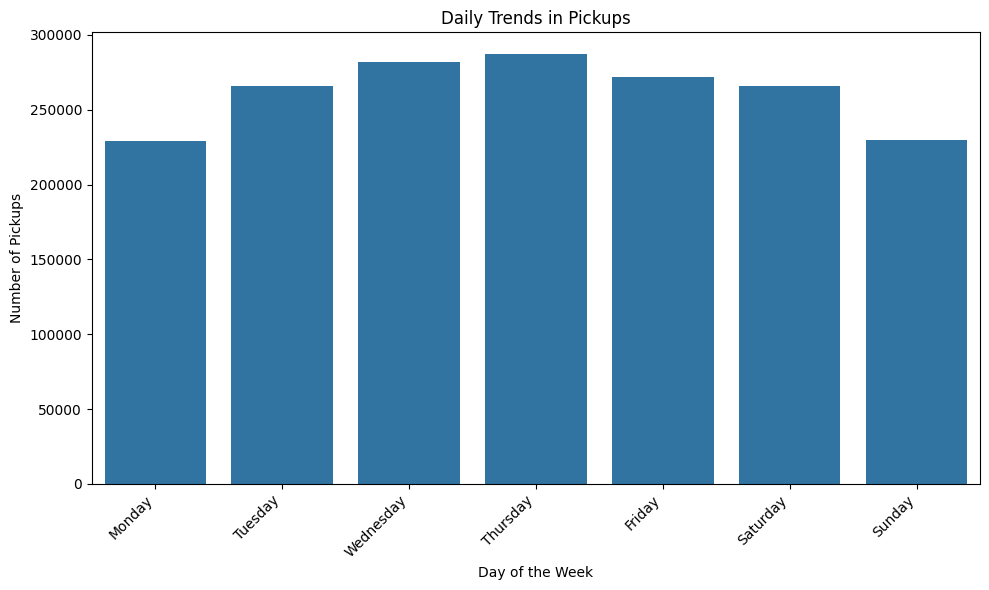

In [37]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

daily_pickups = df.groupby('pickup_day')['tpep_pickup_datetime'].count()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups = daily_pickups.reindex(days_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.title('Daily Trends in Pickups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

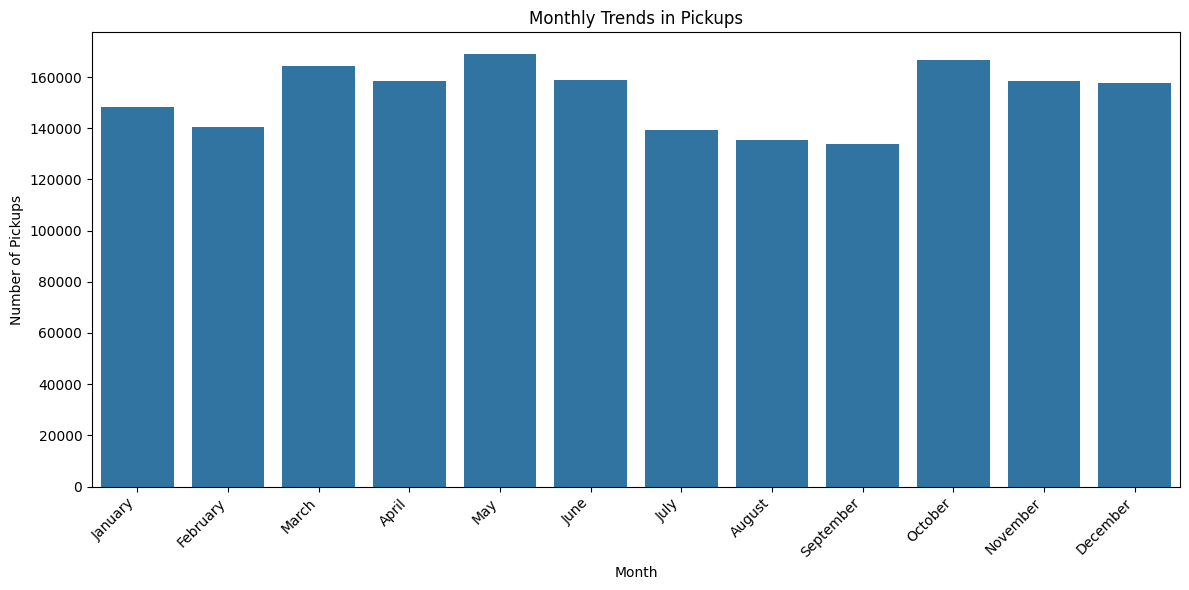

In [38]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
monthly_pickups = df.groupby('pickup_month')['tpep_pickup_datetime'].count()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_pickups = monthly_pickups.reindex(months_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values)
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.title('Monthly Trends in Pickups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [39]:
# Analyse the above parameters
col_to_analyse = ['fare_amount','tip_amount','total_amount','trip_distance']
df_analysis = pd.DataFrame(columns = ['Zero_Count','Negative_Count'])
for col in col_to_analyse:
    df_analysis.loc[col,'Zero_Count'] = df[df[col] == 0][col].count()
    df_analysis.loc[col,'Negative_Count'] = df[df[col] < 0][col].count()
df_analysis


,Zero_Count,Negative_Count
fare_amount,581,0
tip_amount,409387,0
total_amount,265,0
trip_distance,22053,0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [40]:
# Create a df with non zero entries for the selected parameters.
new_df = df.copy()
new_df = new_df[(new_df['fare_amount'] != 0) &
                (new_df['tip_amount'] != 0) &
                (new_df['total_amount'] != 0) &
                (new_df['trip_distance'] != 0)
                ]
print(new_df.shape)


(1413691, 22)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

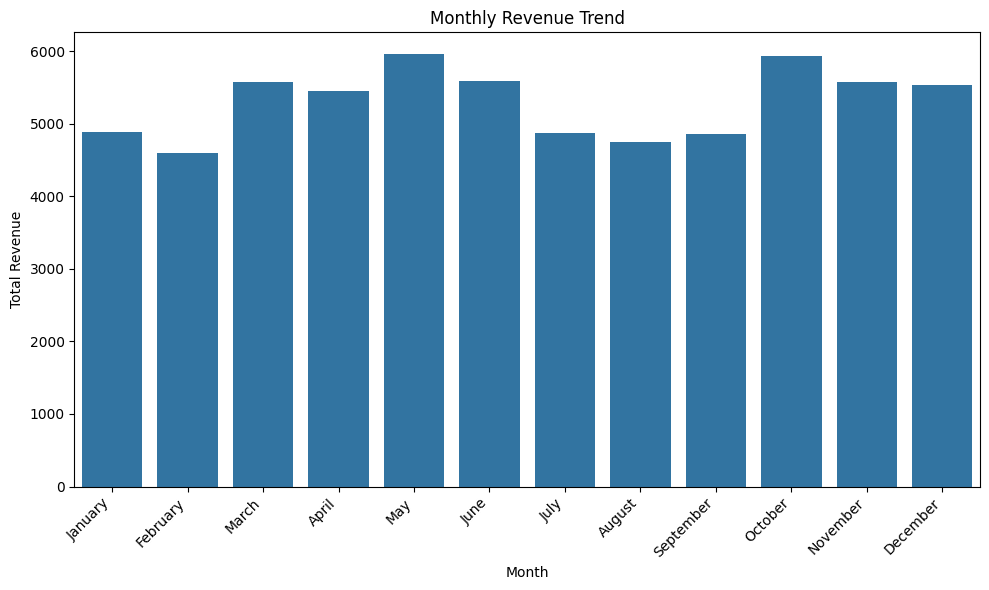

In [41]:
# Group data by month and analyse monthly revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = monthly_revenue.reindex(months_order)
# monthly_revenue

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [42]:
# Calculate proportion of each quarter
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')
quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum()
quarterly_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100
quarterly_proportion.round(2)


,total_amount
pickup_quarter,
2022Q4,0.00
2023Q1,23.69
2023Q2,26.75
2023Q3,22.76
2023Q4,26.81


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

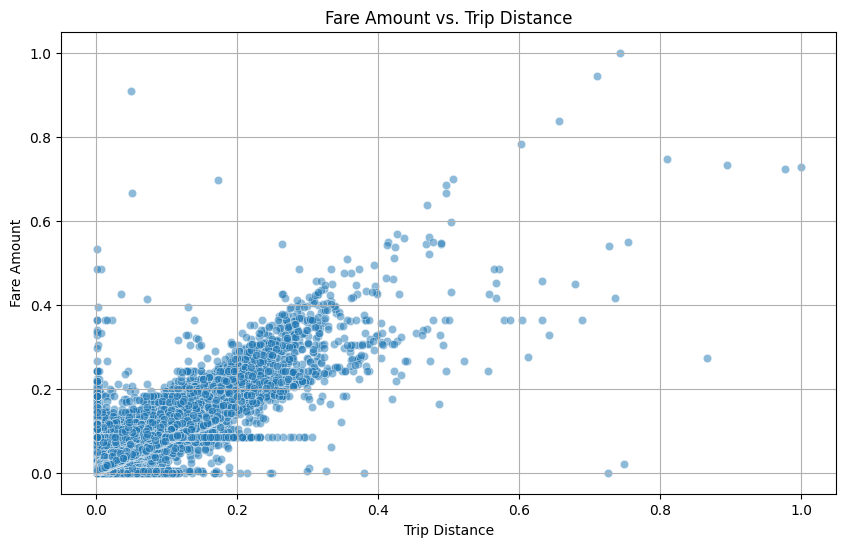

Correlation between trip distance and fare amount: 0.94


In [43]:
# Show how trip fare is affected by distance
subset_df = df[df['trip_distance'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=subset_df, alpha=0.5)
plt.title('Fare Amount vs. Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

correlation = subset_df['trip_distance'].corr(subset_df['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation:.2f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

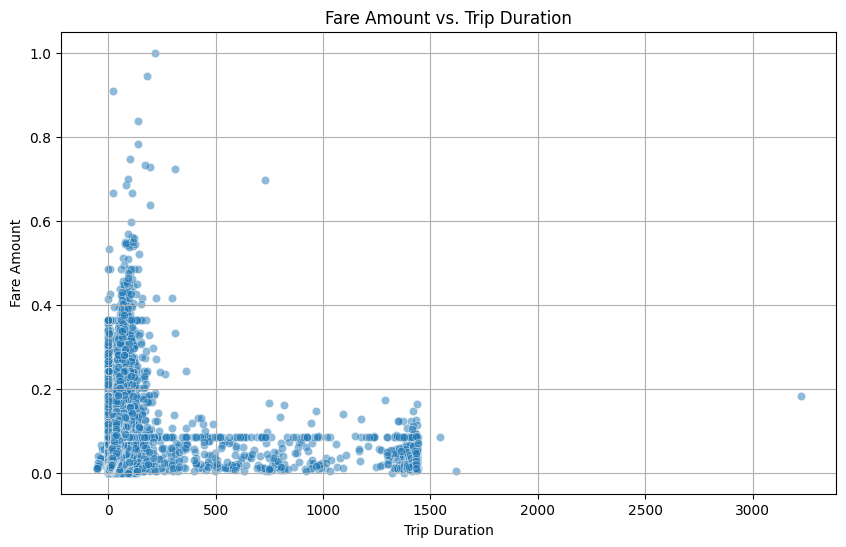

Correlation between trip duration and fare amount: 0.27


In [44]:
# Show relationship between fare and trip duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df, alpha=0.5)
plt.title('Fare Amount vs. Trip Duration')
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

correlation = df['trip_duration'].corr(df['fare_amount'])
print(f"Correlation between trip duration and fare amount: {correlation:.2f}")


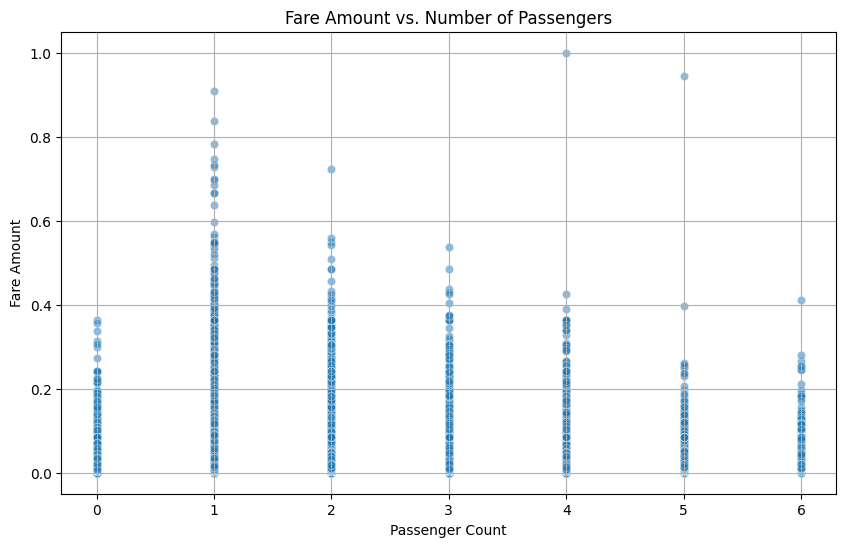

Correlation between passenger count and fare amount: 0.05


In [45]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df, alpha=0.5)
plt.title('Fare Amount vs. Number of Passengers')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

correlation = df['passenger_count'].corr(df['fare_amount'])
print(f"Correlation between passenger count and fare amount: {correlation:.2f}")


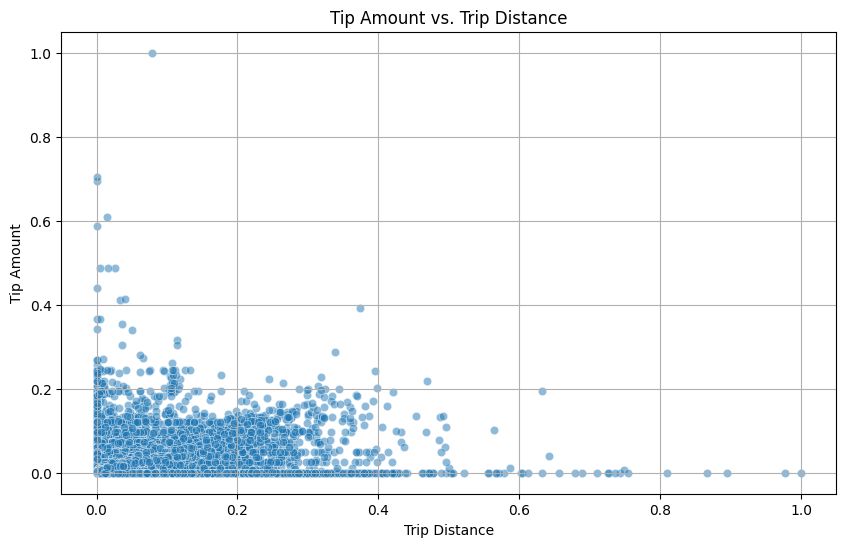

Correlation between trip distance and tip amount: 0.57


In [46]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df, alpha=0.5)
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.grid(True)
plt.show()

correlation = df['trip_distance'].corr(df['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation:.2f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

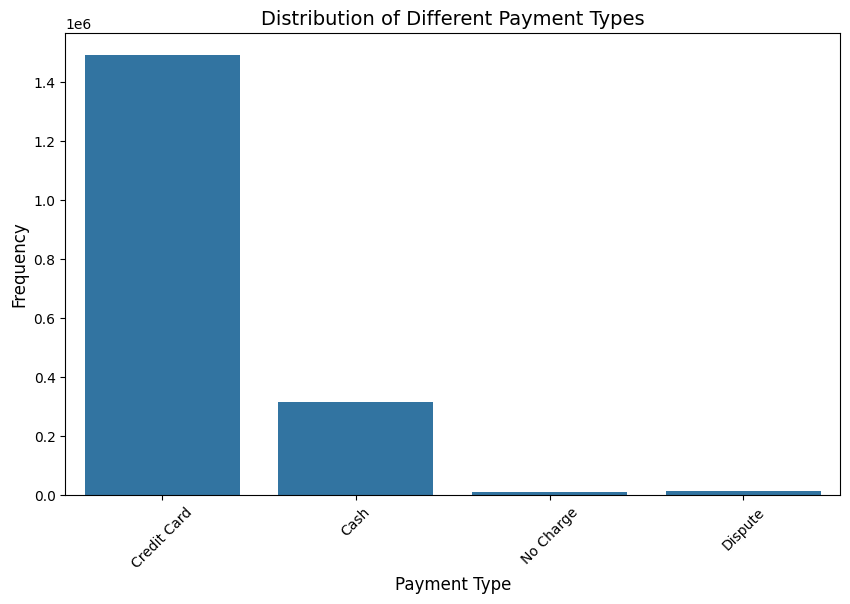

In [47]:
# Analyse the distribution of different payment types (payment_type).
payment_type_dict = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided Trip'}
payment_type_counts = pd.DataFrame(columns=['PaymentType', 'Count'])
for key, value in payment_type_dict.items():
    payment_type_counts.loc[key,'PaymentType'] = value
    payment_type_counts.loc[key,'Count'] = df[df['payment_type'] == key]['payment_type'].count()

payment_type_counts = payment_type_counts[payment_type_counts['Count'] > 0]
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_type_counts, x='PaymentType', y='Count')
plt.title('Distribution of Different Payment Types', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()



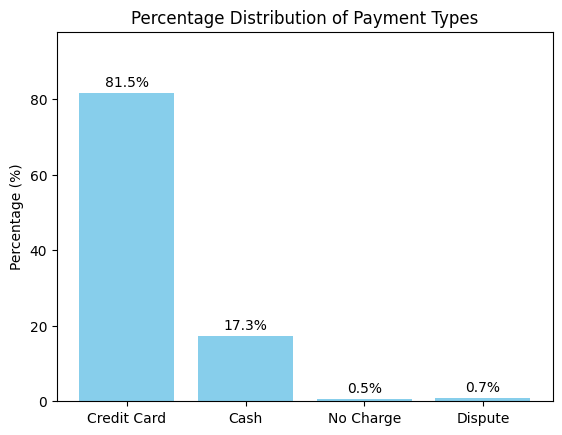

In [48]:
payment_type_dict = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided Trip'}
payment_type_counts = pd.DataFrame(columns=['PaymentType', 'Count'])
for key, value in payment_type_dict.items():
    payment_type_counts.loc[key,'PaymentType'] = value
    payment_type_counts.loc[key,'Count'] = df[df['payment_type'] == key]['payment_type'].count()

payment_type_counts = payment_type_counts[payment_type_counts['Count'] > 0]

# Calculate percentage distribution
payment_type_counts['Percentage'] = payment_type_counts['Count'] / payment_type_counts['Count'].sum() * 100

# Plot bar chart
bars = plt.bar(payment_type_counts['PaymentType'], payment_type_counts['Percentage'], color='skyblue')

# Add percentage labels on top of bars
for bar, percentage in zip(bars, payment_type_counts['Percentage']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{percentage:.1f}%',
             ha='center', va='bottom')

plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Payment Types')
plt.ylim(0, max(payment_type_counts['Percentage'])*1.2)  # Add some space for labels on top
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [49]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [50]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/Asssignements/EDA/data_NYC_Taxi/taxi_zones/taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

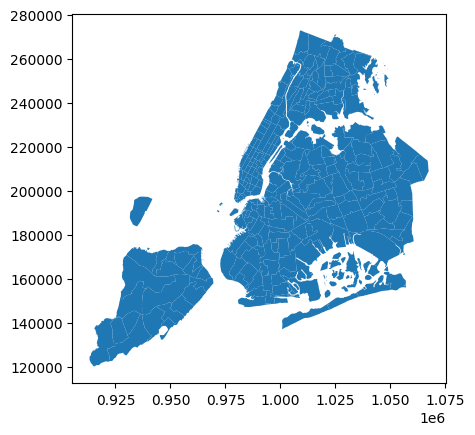

In [51]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [55]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')

merged_df.head()



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_month,pickup_quarter,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2022-12-31 23:36:04,2022-12-31 23:43:31,1.0,0.010028,1.0,N,43,141,1,...,December,2022Q4,7.450000,43.0,0.099739,0.000380,Central Park,43.0,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21..."
1,2,2023-01-01 00:18:34,2023-01-01 00:23:55,1.0,0.005874,1.0,N,144,211,2,...,January,2023Q1,5.350000,144.0,0.027620,0.000047,Little Italy/NoLiTa,144.0,Manhattan,"POLYGON ((985411.76 200369.518, 985342.573 200..."
2,2,2023-01-01 00:32:27,2023-01-01 00:37:01,2.0,0.005459,1.0,N,79,107,1,...,January,2023Q1,4.566667,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
3,1,2023-01-01 00:26:11,2023-01-01 00:40:21,2.0,0.013647,1.0,Y,48,238,1,...,January,2023Q1,14.166667,48.0,0.043747,0.000094,Clinton East,48.0,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21..."
4,2,2023-01-01 00:10:09,2023-01-01 00:29:28,1.0,0.013469,1.0,N,68,137,1,...,January,2023Q1,19.316667,68.0,0.049337,0.000111,East Chelsea,68.0,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [57]:
# Group data by location and calculate the number of trips

trip_counts = merged_df.groupby('PULocationID').size().reset_index(name='TripCount')
trip_counts.head()


,PULocationID,TripCount
0,1,234
1,2,2
2,3,39
3,4,1836
4,5,25


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [58]:
# Merge trip counts back to the zones GeoDataFrame

trip_zones_df = pd.merge(zones, trip_counts, left_on='LocationID', right_on='PULocationID', how='left')
trip_zones_df.head()



,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,TripCount
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,234.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,39.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1836.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,25.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

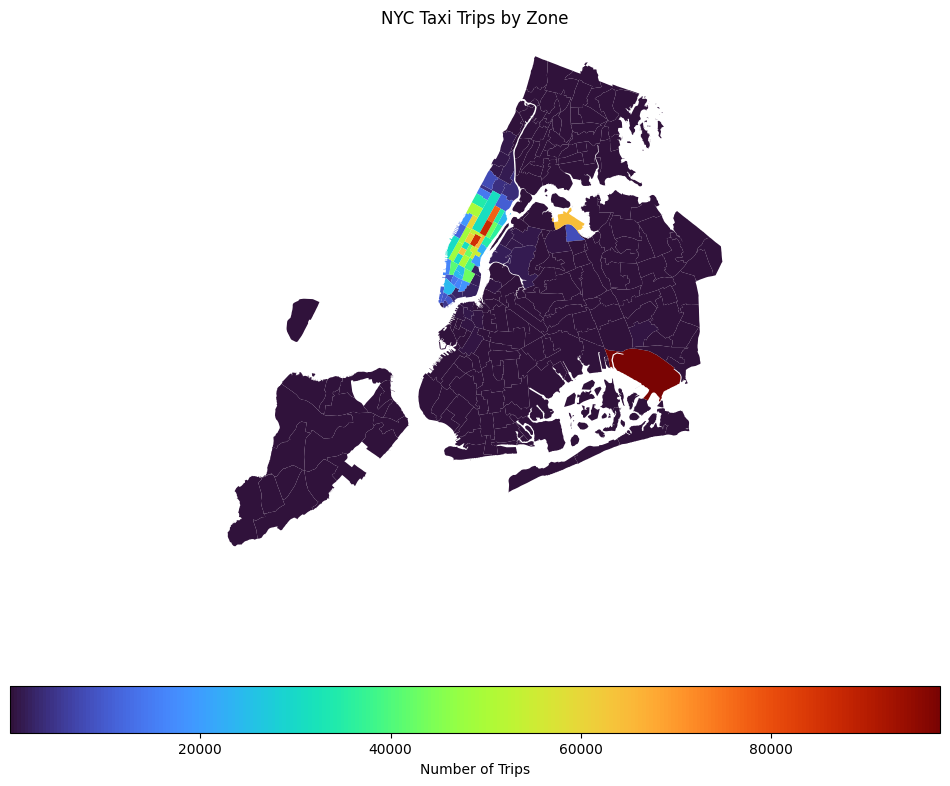

In [90]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
trip_zones_df.plot(
    column='TripCount',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "horizontal"
    },
    cmap='turbo'
)


# Plot the map and display it
ax.set_title("NYC Taxi Trips by Zone")
plt.axis('off')
plt.show()


In [60]:
# can you try displaying the zones DF sorted by the number of trips?
trip_zones_df.sort_values(by='TripCount', ascending=False).head()

trip_zones_df.head()



,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,TripCount
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,234.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,39.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1836.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,25.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [61]:
# Find routes which have the slowest speeds at different times of the day
route_df = df[['PULocationID', 'DOLocationID', 'trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime','hour']].copy()
route_df['trip_time_in_hrs'] = (route_df['tpep_dropoff_datetime'] - route_df['tpep_pickup_datetime']).dt.total_seconds() / 3600
route_df = route_df[(route_df['trip_time_in_hrs'] > 0) & (route_df['trip_distance'] > 0)]

route_df['trip_speed'] = route_df['trip_distance'].astype(float)/route_df['trip_time_in_hrs'].astype(float)

grouped_route_df = route_df.groupby(['PULocationID', 'DOLocationID','hour'])['trip_speed'].mean().reset_index()
slowest_routes = grouped_route_df.sort_values(by='trip_speed').head(10)
print(slowest_routes)


        PULocationID  DOLocationID  hour  trip_speed
94401            223           223     4    0.000006
89692            194           194    15    0.000016
89652            193           264    10    0.000119
93555            215           215    16    0.000123
26863             80            68    17    0.000218
111799           237           264     2    0.000297
93714            216           181     9    0.000358
107719           235           181     9    0.000381
50308            135            47    13    0.000408
14984             51            48     9    0.000413


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

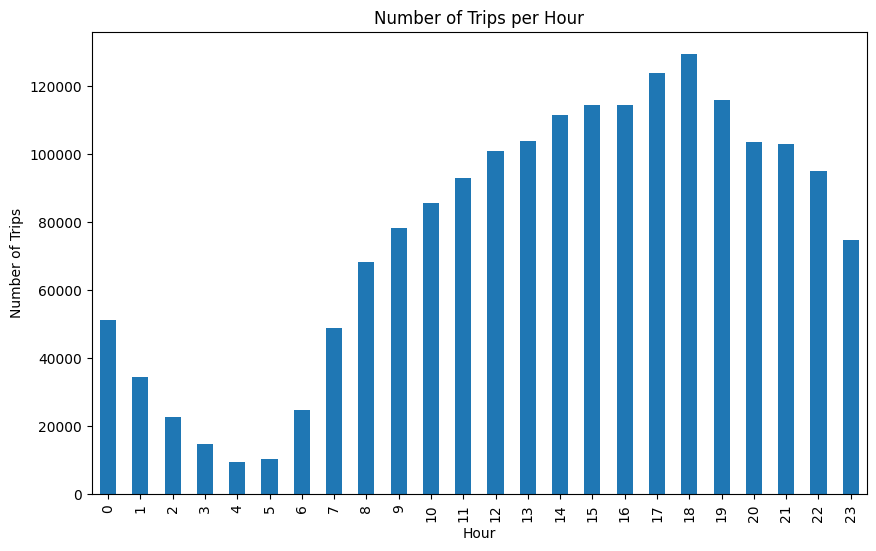

Busiest hour: 18
Number of Trips in Busiest hour: 129425


In [62]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trips = df['hour'].value_counts().sort_index()
hourly_trips.head(24)
hourly_trips.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Trips per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()
busiest_hour = hourly_trips.idxmax()
print(f"Busiest hour: {busiest_hour}")
print(f"Number of Trips in Busiest hour: {hourly_trips[busiest_hour]}")



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [63]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
trip_counts = df['hour'].value_counts().sort_index()
top5_hours = trip_counts.sort_values(ascending=False).head(5)
scaled_top5 = (top5_hours / sample_fraction).astype(int)
scaled_top5



,count
hour,
18,2588500
17,2476800
19,2320340
16,2287060
15,2286020


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [64]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined,hour,pickup_day,pickup_month,pickup_quarter,trip_duration
0,2,2022-12-31 23:36:04,2022-12-31 23:43:31,1.0,0.010028,1.0,N,43,141,1,...,0.0,1.0,0.021580,2.5,0.00,23,Saturday,December,2022Q4,7.450000
2,2,2023-01-01 00:18:34,2023-01-01 00:23:55,1.0,0.005874,1.0,N,144,211,2,...,0.0,1.0,0.014627,2.5,0.00,0,Sunday,January,2023Q1,5.350000
3,2,2023-01-01 00:32:27,2023-01-01 00:37:01,2.0,0.005459,1.0,N,79,107,1,...,0.0,1.0,0.018283,2.5,0.00,0,Sunday,January,2023Q1,4.566667
4,1,2023-01-01 00:26:11,2023-01-01 00:40:21,2.0,0.013647,1.0,Y,48,238,1,...,0.0,1.0,0.027695,2.5,0.00,0,Sunday,January,2023Q1,14.166667
5,2,2023-01-01 00:10:09,2023-01-01 00:29:28,1.0,0.013469,1.0,N,68,137,1,...,0.0,1.0,0.033665,2.5,0.00,0,Sunday,January,2023Q1,19.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896395,2,2023-12-31 23:15:46,2023-12-31 23:23:00,1.0,0.010384,1.0,N,236,238,2,...,0.0,1.0,0.018823,2.5,0.00,23,Sunday,December,2023Q4,7.233333
1896396,2,2023-12-31 23:16:32,2023-12-31 23:27:46,2.0,0.013825,1.0,N,237,238,2,...,0.0,1.0,0.023019,2.5,0.00,23,Sunday,December,2023Q4,11.233333
1896397,2,2023-12-31 23:37:12,2023-12-31 23:44:54,1.0,0.011986,1.0,N,79,233,2,...,0.0,1.0,0.018823,2.5,0.00,23,Sunday,December,2023Q4,7.700000
1896398,2,2023-12-31 23:43:53,2023-12-31 23:57:50,1.0,0.014419,1.0,N,170,79,1,...,0.0,1.0,0.031015,2.5,0.00,23,Sunday,December,2023Q4,13.950000


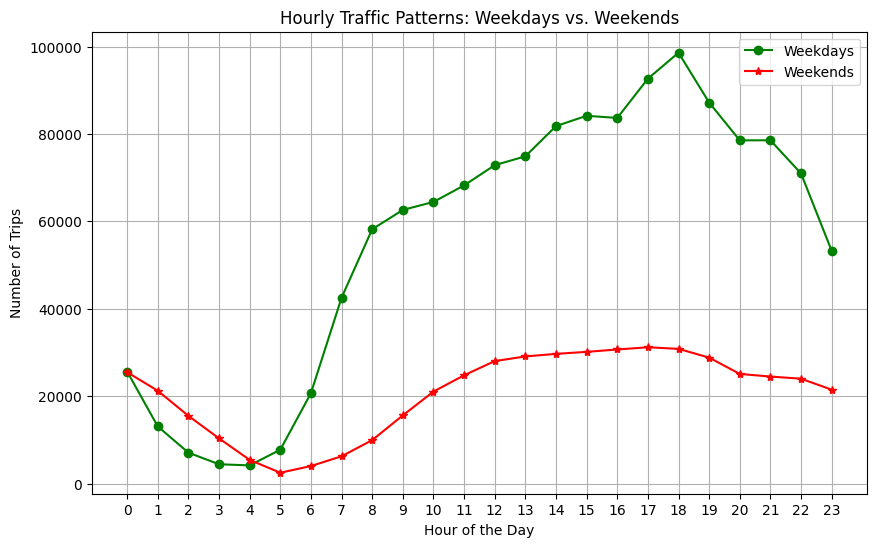

In [65]:
# Compare traffic trends for the week days and weekends
# df_weekday = df[~(df['pickup_day'] == 'Saturday' | df['pickup_day'] == 'Sunday')]  # Monday to Friday
df_weekend = df[(df['pickup_day'] == 'Saturday') | (df['pickup_day'] == 'Sunday')]  # Saturday and Sunday
df_weekday = df[~((df['pickup_day'] == 'Saturday') | (df['pickup_day'] == 'Sunday'))]  # Saturday and Sunday

weekday_hourly_counts = df_weekday.groupby(df['hour'])['hour'].count()
weekend_hourly_counts = df_weekend.groupby(df['hour'])['hour'].count()
plt.figure(figsize=(10, 6))
plt.plot(weekday_hourly_counts.index, weekday_hourly_counts.values, label='Weekdays', marker='o', color = 'green')
plt.plot(weekend_hourly_counts.index, weekend_hourly_counts.values, label='Weekends', marker='*', color = 'red')
plt.title('Hourly Traffic Patterns: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [66]:
# Find top 10 pickup and dropoff zones
pickup_df = df['PULocationID'].value_counts().head(10).reset_index()
pickup_df.columns = ['LocationID', 'Total_Trips']
pickup_df = pickup_df.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Pickup Zones")
print(pickup_df)

drop_df = df['DOLocationID'].value_counts().head(10).reset_index()
drop_df.columns = ['LocationID', 'Total_Trips']
drop_df = drop_df.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Dropoff Zones")
print(drop_df)

Top 10 Pickup Zones
   LocationID  Total_Trips                          zone
0         132        97726                   JFK Airport
1         237        87136         Upper East Side South
2         161        85710                Midtown Center
3         236        76747         Upper East Side North
4         162        66033                  Midtown East
5         138        64277             LaGuardia Airport
6         186        64098  Penn Station/Madison Sq West
7         230        61498     Times Sq/Theatre District
8         142        60079           Lincoln Square East
9         170        54697                   Murray Hill
Top 10 Dropoff Zones
   LocationID  Total_Trips                       zone
0         236        81277      Upper East Side North
1         237        77782      Upper East Side South
2         161        71446             Midtown Center
3         230        56044  Times Sq/Theatre District
4         170        54134                Murray Hill
5       

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [67]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_df = df['PULocationID'].value_counts().reset_index()
dropoff_df = df['DOLocationID'].value_counts().reset_index()
pickup_df.columns = ['LocationID', 'Pickup_Trips']
dropoff_df.columns = ['LocationID', 'Dropoff_Trips']

combined_df = pickup_df.merge(dropoff_df, on='LocationID', how='left')
combined_df = combined_df.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
combined_df = combined_df[(combined_df['Dropoff_Trips'] > 0) & (combined_df['Pickup_Trips'] > 0) & (~(combined_df['zone'].isnull()))]
combined_df['ratio'] = (combined_df['Pickup_Trips'] / combined_df['Dropoff_Trips'])
top_10_pickup_zones = combined_df.sort_values(by='ratio', ascending=False).head(10)
bottom_10_pickup_zones = combined_df.sort_values(by='ratio', ).head(10)


In [68]:
top_10_pickup_zones

,LocationID,Pickup_Trips,Dropoff_Trips,zone,ratio
47,70,8390,1042.0,East Elmhurst,8.051823
0,132,97726,21467.0,JFK Airport,4.552383
5,138,64277,22323.0,LaGuardia Airport,2.879407
248,2,2,1.0,Jamaica Bay,2.000000
6,186,64098,40339.0,Penn Station/Madison Sq West,1.588983
30,114,24288,17414.0,Greenwich Village South,1.394740
24,43,30924,22536.0,Central Park,1.372204
18,249,40863,30578.0,West Village,1.336353
4,162,66033,51983.0,Midtown East,1.270281
25,100,30620,25300.0,Garment District,1.210277


In [69]:
bottom_10_pickup_zones

,LocationID,Pickup_Trips,Dropoff_Trips,zone,ratio
253,58,2,51.0,Country Club,0.039216
251,221,2,49.0,Stapleton,0.040816
92,1,234,5186.0,Newark Airport,0.045121
196,257,39,748.0,Windsor Terrace,0.052139
95,112,217,4026.0,Greenpoint,0.053900
226,16,17,314.0,Bayside,0.054140
176,198,55,1009.0,Ridgewood,0.054509
228,64,13,230.0,Douglaston,0.056522
254,176,1,17.0,Oakwood,0.058824
250,27,2,33.0,Breezy Point/Fort Tilden/Riis Beach,0.060606


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [70]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_df = df[(df['hour'] >= 23) | (df['hour'] <= 5)]
night_df = night_df['PULocationID'].value_counts().reset_index()

night_df.columns = ['LocationID', 'Trip_Counts']
night_df = night_df.merge(zones[['LocationID', 'zone']], on ='LocationID', how = 'left')

top_10night_pickup_zones = night_df.sort_values(by='Trip_Counts', ascending=False).head(10)
top_10night_pickup_zones.columns = ['LocationID', 'Trip_Counts', 'Pickup_Zone']
# Top 10 night pickup zones
top_10night_pickup_zones




,LocationID,Trip_Counts,Pickup_Zone
0,79,15441,East Village
1,132,14776,JFK Airport
2,249,12650,West Village
3,48,10431,Clinton East
4,148,9648,Lower East Side
5,114,8942,Greenwich Village South
6,230,8177,Times Sq/Theatre District
7,186,7071,Penn Station/Madison Sq West
8,164,6190,Midtown South
9,138,6096,LaGuardia Airport


In [71]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_df = df[(df['hour'] >= 23) | (df['hour'] <= 5)]
night_df = night_df['DOLocationID'].value_counts().reset_index()

night_df.columns = ['LocationID', 'Trip_Counts']
night_df = night_df.merge(zones[['LocationID', 'zone']], on ='LocationID', how = 'left')

top_10night_dropoff_zones = night_df.sort_values(by='Trip_Counts', ascending=False).head(10)
top_10night_dropoff_zones.columns = ['LocationID', 'Trip_Counts', 'Dropoff_Zone']
# Top 10 night dropoff zones
top_10night_dropoff_zones




,LocationID,Trip_Counts,Dropoff_Zone
0,79,8430,East Village
1,48,6970,Clinton East
2,170,6303,Murray Hill
3,107,5796,Gramercy
4,68,5693,East Chelsea
5,141,5193,Lenox Hill West
6,263,5084,Yorkville West
7,249,5072,West Village
8,230,4630,Times Sq/Theatre District
9,90,4426,Flatiron


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [72]:
# Filter for night hours (11 PM to 5 AM)
night_df = df[(df['hour'] >= 23) | (df['hour'] <= 5)]
day_df = df[(df['hour'] >= 6) & (df['hour'] <= 22)]
night_time_revenue = night_df['total_amount'].sum()
day_time_revenue = day_df['total_amount'].sum()
total_revenue = df['total_amount'].sum()
print(f"Night time revenue Share: {night_time_revenue/total_revenue:.2%}")
print(f"Day time revenue Share: {day_time_revenue/total_revenue:.2%}")


Night time revenue Share: 12.12%
Day time revenue Share: 87.88%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [73]:
# Analyse the fare per mile per passenger for different passenger counts
pax_df = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)][['passenger_count', 'trip_distance','total_amount']]
pax_df = pax_df.groupby(['passenger_count']).sum()
pax_df['avg_fare_per_mile'] = pax_df['trip_distance'] / pax_df['total_amount']
pax_df.reset_index(inplace=True)
pax_df['avg_fare_per_mile_per_pax'] = pax_df['avg_fare_per_mile'] / pax_df['passenger_count']
pax_df




,passenger_count,trip_distance,total_amount,avg_fare_per_mile,avg_fare_per_mile_per_pax
0,1.0,27062.921320,45854.534037,0.590191,0.590191
1,2.0,6698.462588,10471.182964,0.639704,0.319852
2,3.0,1594.012817,2552.829972,0.624410,0.208137
3,4.0,962.307660,1504.093358,0.639793,0.159948
4,5.0,485.788287,811.195864,0.598854,0.119771
5,6.0,313.773334,526.314686,0.596171,0.099362


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [74]:
# Compare the average fare per mile for different days and for different times of the day
temp_df = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0)][['trip_distance','total_amount','hour','pickup_day']]
temp_df['fare_per_mile'] = temp_df['trip_distance'] / temp_df['total_amount']
hourly_avg_df = temp_df.groupby(['hour'])['fare_per_mile'].mean().reset_index()
hourly_avg_df.reset_index()
hourly_avg_df

,hour,fare_per_mile
0,0,0.556726
1,1,0.549024
2,2,0.546853
3,3,0.574301
4,4,0.631854
5,5,0.649081
6,6,0.614117
7,7,0.540669
8,8,0.492234
9,9,0.482615


In [75]:
Day_avg_df = temp_df.groupby(['pickup_day'])['fare_per_mile'].mean().reset_index()
Day_avg_df

,pickup_day,fare_per_mile
0,Friday,0.475572
1,Monday,0.502020
2,Saturday,0.494441
3,Sunday,0.536380
4,Thursday,0.463126
5,Tuesday,0.468968
6,Wednesday,0.462874


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

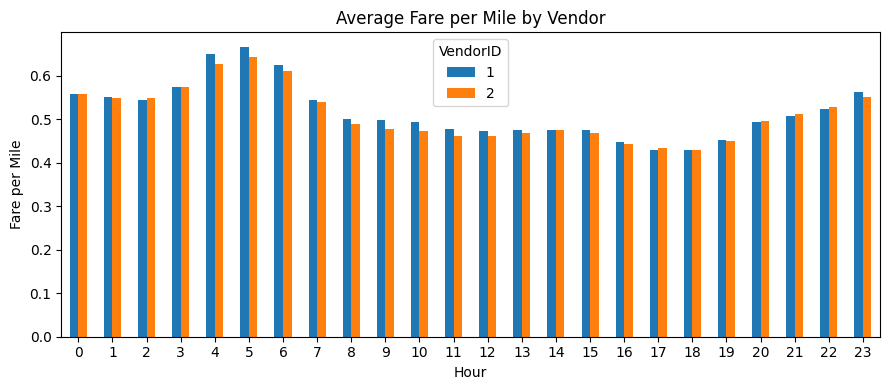

In [76]:
# Compare fare per mile for different vendors
temp_df = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0)][['VendorID','trip_distance','total_amount','hour']]
temp_df['fare_per_mile'] = temp_df['trip_distance'] / temp_df['total_amount']
vendor_df = temp_df.groupby(['VendorID','hour'])['fare_per_mile'].mean().reset_index()
vendor_df.reset_index()


vendor_df_pivot = vendor_df.pivot(index='hour', columns='VendorID', values='fare_per_mile')
vendor_df_pivot.plot(kind='bar', figsize=(9, 4))
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Hour')
plt.ylabel('Fare per Mile')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


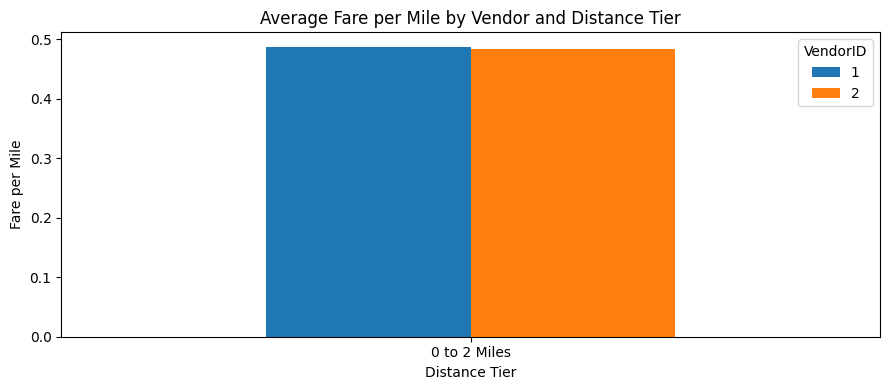

In [77]:
# Defining distance tiers

temp_df = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0)][['VendorID','trip_distance','total_amount']]
temp_df['tier'] = None
temp_df.loc[(temp_df['trip_distance' ] <= 2),'tier'] = '0 to 2 Miles'
temp_df.loc[(temp_df['trip_distance' ] > 2) & (temp_df['trip_distance' ] <= 5),'tier'] = '2 to 5 Miles'
temp_df.loc[(temp_df['trip_distance' ] > 5),'tier'] = 'More then 5 Miles'
temp_df['fare_per_mile'] = temp_df['trip_distance'] / temp_df['total_amount']

temp_df = temp_df.groupby(['VendorID', 'tier'])['fare_per_mile'].mean().reset_index()
temp_df.reset_index()
temp_df_pivot = temp_df.pivot(index='tier', columns='VendorID', values='fare_per_mile')
temp_df_pivot.plot(kind='bar', figsize=(9, 4))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [92]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
temp_df = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0) & (df['passenger_count'] > 0)][['trip_distance','passenger_count','tip_amount','total_amount', 'tpep_pickup_datetime', 'hour']]
temp_df['tip_percentage'] = (temp_df['tip_amount'] / temp_df['total_amount'])*100

# Bucketing distances
temp_df.loc[(temp_df['trip_distance' ] <= 2),'Distance_tier'] = '0 to 2 Miles'
temp_df.loc[(temp_df['trip_distance' ] > 2) & (temp_df['trip_distance' ] <= 5),'Distance_tier'] = '2 to 5 Miles'
temp_df.loc[(temp_df['trip_distance' ] > 5),'Distance_tier'] = 'More then 5 Miles'

# Bucketing Timeperiod
temp_df.loc[(temp_df['hour' ] <= 6),'Time_period'] = 'Early Morning'
temp_df.loc[(temp_df['hour' ] > 6) & (temp_df['hour' ] <= 12),'Time_period'] = 'Morning'
temp_df.loc[(temp_df['hour' ] > 12) & (temp_df['hour' ] <= 18),'Time_period'] = 'Afternoon'
temp_df.loc[(temp_df['hour' ] > 18) & (temp_df['hour' ] <= 24),'Time_period'] = 'Evening'

temp_df = temp_df[temp_df['tip_percentage'] > 0]
temp_df = temp_df.groupby(['trip_distance','passenger_count','Distance_tier','Time_period'])['tip_percentage'].mean().reset_index()
temp_df.sort_values(by='tip_percentage').head(10)
temp_df.reset_index(inplace=True)

temp_df

,index,trip_distance,passenger_count,Distance_tier,Time_period,tip_percentage
0,0,0.000059,1.0,0 to 2 Miles,Afternoon,37.545476
1,1,0.000059,1.0,0 to 2 Miles,Early Morning,37.119083
2,2,0.000059,1.0,0 to 2 Miles,Evening,33.783609
3,3,0.000059,1.0,0 to 2 Miles,Morning,56.326317
4,4,0.000059,2.0,0 to 2 Miles,Afternoon,25.957721
...,...,...,...,...,...,...
38777,38777,0.564173,1.0,0 to 2 Miles,Evening,18.397294
38778,38778,0.587551,2.0,0 to 2 Miles,Afternoon,3.041488
38779,38779,0.631935,1.0,0 to 2 Miles,Evening,33.907209
38780,38780,0.642022,4.0,0 to 2 Miles,Afternoon,10.200960


In [93]:
# Time period with lowest tip %
time_period_df = temp_df.groupby(['Time_period'])['tip_percentage'].mean().reset_index().sort_values(by='tip_percentage').head(5)
time_period_df

,Time_period,tip_percentage
1,Early Morning,30.319907
2,Evening,30.487970
0,Afternoon,30.874937
3,Morning,31.048132


In [94]:
# Distance Tier with lowest tip %
distance_df = temp_df.groupby(['Distance_tier'])['tip_percentage'].mean().reset_index().sort_values(by='tip_percentage').head(5)
distance_df

,Distance_tier,tip_percentage
0,0 to 2 Miles,30.705468


In [95]:
# Pax segment with lowest tip %
passenger_count_df = temp_df.groupby(['passenger_count'])['tip_percentage'].mean().reset_index().sort_values(by='tip_percentage').head(5)
passenger_count_df


,passenger_count,tip_percentage
0,1.0,30.315061
1,2.0,30.668905
2,3.0,30.725878
4,5.0,31.038703
5,6.0,31.043807


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [96]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
temp_df = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0) & (df['passenger_count'] > 0)][['trip_distance','passenger_count','tip_amount','total_amount', 'hour']]
temp_df['tip_percentage'] = (temp_df['tip_amount'] / temp_df['total_amount'])*100

# Bucketing tip %
temp_df.loc[(temp_df['tip_percentage' ] <= 10),'tip_bucket'] = 'less then 10%'
temp_df.loc[(temp_df['tip_percentage' ] > 25),'tip_bucket'] = 'More then 25%'

temp_df.reset_index(inplace=True)
temp_df



,index,trip_distance,passenger_count,tip_amount,total_amount,hour,tip_percentage,tip_bucket
0,0,0.010028,1.0,0.007317,0.021580,23,33.906504,More then 25%
1,2,0.005874,1.0,0.000000,0.014627,0,0.000000,less then 10%
2,3,0.005459,2.0,0.007439,0.018283,0,40.687805,More then 25%
3,4,0.013647,2.0,0.011220,0.027695,0,40.511667,More then 25%
4,5,0.013469,1.0,0.011415,0.033665,0,33.906504,More then 25%
...,...,...,...,...,...,...,...,...
1780617,1896395,0.010384,1.0,0.000000,0.018823,23,0.000000,less then 10%
1780618,1896396,0.013825,2.0,0.000000,0.023019,23,0.000000,less then 10%
1780619,1896397,0.011986,1.0,0.000000,0.018823,23,0.000000,less then 10%
1780620,1896398,0.014419,1.0,0.014561,0.031015,23,46.947467,More then 25%


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

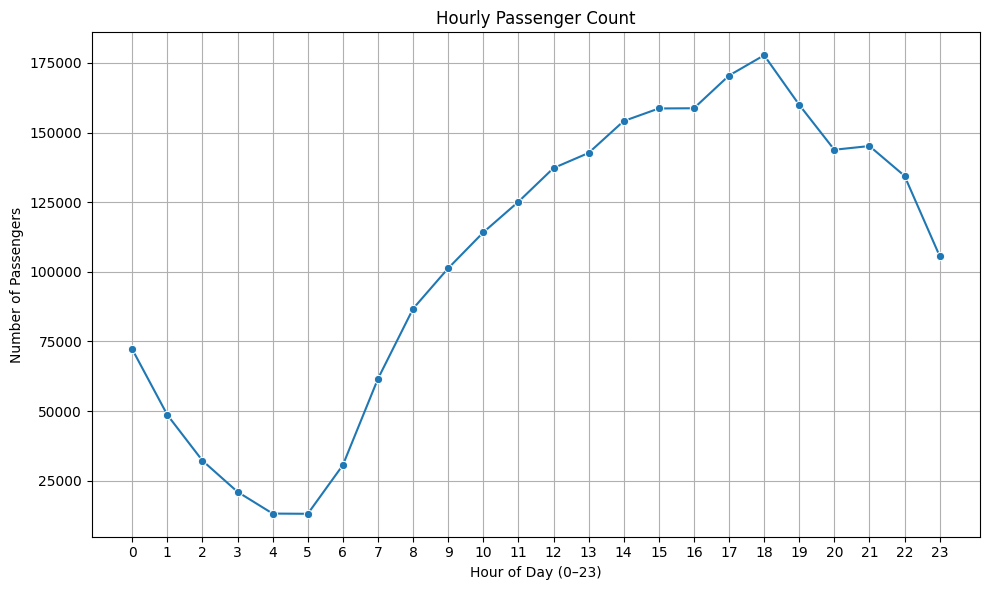

In [83]:
# See how passenger count varies across hours and days
pax_df = df[df['passenger_count'] > 0][['passenger_count','hour']].copy()
pax_df = pax_df.groupby('hour')['passenger_count'].sum().reset_index()
pax_df

plt.figure(figsize=(10, 6))
sns.lineplot(data=pax_df, x='hour', y='passenger_count', marker='o')
plt.title('Hourly Passenger Count')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Passengers')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.show()


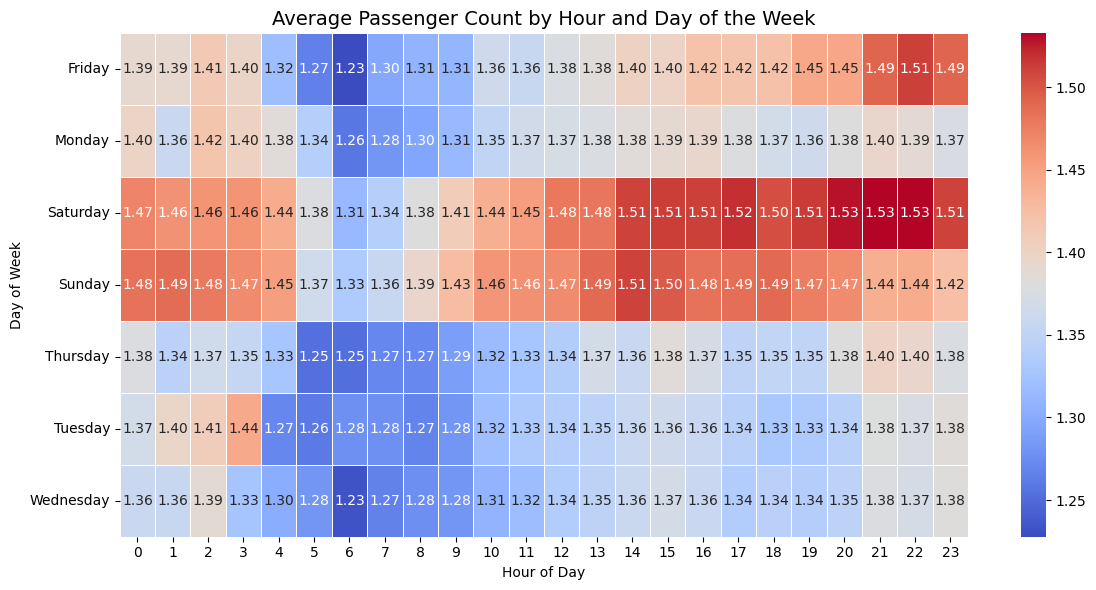

In [98]:
pax_df = df[df['passenger_count'] > 0][['passenger_count','pickup_day','hour']].copy()
pax_df = pax_df.groupby(['pickup_day','hour'])['passenger_count'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(pax_df, cmap='coolwarm', linewidths=0.5, annot=True, fmt=".2f")
plt.title('Average Passenger Count by Hour and Day of the Week', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

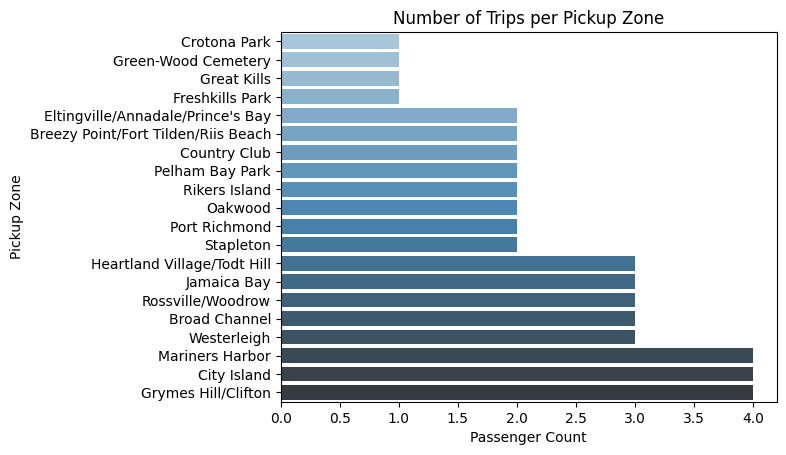

In [99]:
# How does passenger count vary across zones

zone_wise_pax = df.groupby('PULocationID')['passenger_count'].sum().reset_index()
zone_wise_pax.columns = ['LocationID', 'passenger_count']
zone_wise_pax = zone_wise_pax.merge(zones[['LocationID', 'zone']], on ='LocationID', how = 'left')
zone_wise_pax = zone_wise_pax.groupby('zone')['passenger_count'].sum().reset_index().sort_values(by='passenger_count').head(20)
sns.barplot(data=zone_wise_pax, x='passenger_count', y='zone', palette='Blues_d')
plt.title('Number of Trips per Pickup Zone')
plt.xlabel('Passenger Count')
plt.ylabel('Pickup Zone')
plt.show()

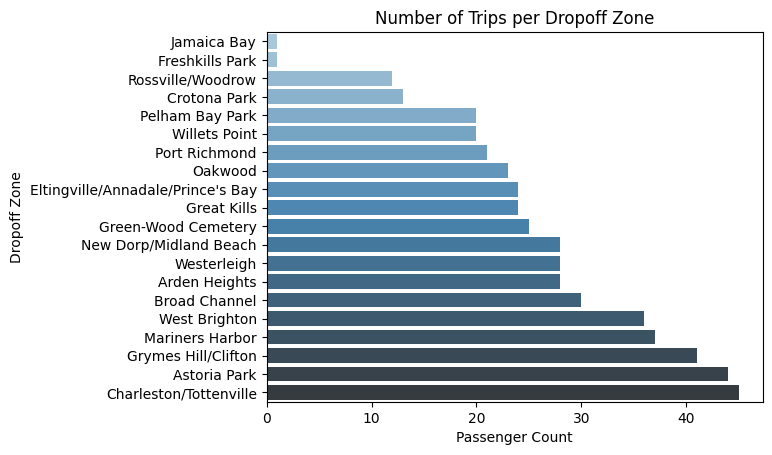

In [86]:

zone_wise_pax = df.groupby('DOLocationID')['passenger_count'].sum().reset_index()
zone_wise_pax.columns = ['LocationID', 'passenger_count']
zone_wise_pax = zone_wise_pax.merge(zones[['LocationID', 'zone']], on ='LocationID', how = 'left')
zone_wise_pax = zone_wise_pax.groupby('zone')['passenger_count'].sum().reset_index().sort_values(by='passenger_count').head(20)
sns.barplot(data=zone_wise_pax, x='passenger_count', y='zone', palette='Blues_d')
plt.title('Number of Trips per Dropoff Zone')
plt.xlabel('Passenger Count')
plt.ylabel('Dropoff Zone')
plt.show()

In [87]:
# For a more detailed analysis, we can use the zones_with_trips(trip_zones_df) GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)
trip_zones_df = trip_zones_df.merge(avg_passenger_by_zone, left_on='LocationID', right_on='PULocationID', how='left')
trip_zones_df

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID_x,TripCount,PULocationID_y,avg_passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,234.0,1.0,1.837607
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0,2.0,1.500000
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,39.0,3.0,1.128205
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1836.0,4.0,1.416667
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,25.0,5.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ...",259.0,51.0,259.0,1.039216
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",260.0,352.0,260.0,1.267045
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",261.0,9452.0,261.0,1.531634
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",262.0,23749.0,262.0,1.308813


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

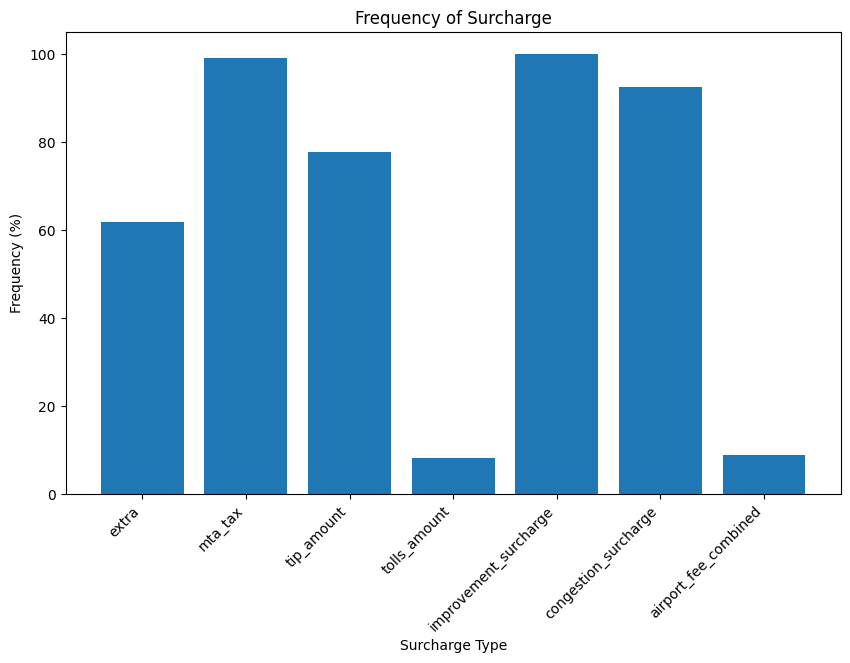

In [88]:
# How often is each surcharge applied?
surcharge_columns = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee_combined']

surcharge_freq = df[surcharge_columns].astype(bool).sum() / len(df) * 100


plt.figure(figsize=(10, 6))
plt.bar(surcharge_freq.index, surcharge_freq.values)
plt.title('Frequency of Surcharge')
plt.xlabel('Surcharge Type')
plt.ylabel('Frequency (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Key Takeaways**

- When people travel:
    Demand shoots up during office rush hours, weekends, and a few busy months of the year. Areas with nightlife stay active late into the night.

- How money flows:
    Fares mostly depend on how far and how long the trip is. Shared rides often come with discounts. Tip amounts change based on the type of trip and customer experience.

- Where people go:
    Airports, major hubs, and tourist spots attract the most rides. Some areas get more pickups than drop-offs and vice-versa. Nightlife areas turn into hotspots after dark.

- Vendors and extra charges:
    Different vendors follow different pricing patterns. Some surcharges appear often, and long-distance trips may follow tiered prices.


**Optimization Recommendations**

**Demand Strategy**

- Prioritize coverage in high-demand areas and peak timings.

- Strengthen late-night operations in nightlife corridors.

- Develop tailored offerings for groups and shared-ride customers.

**Supply Strategy**

- Increase fleet presence in high-demand zones during peak hours.

- Implement dynamic pricing aligned with demand and trip attributes.

- Guide drivers to reposition strategically to balance supply.

- Offer incentives for servicing low-demand periods or underserved locations.

**Customer Experience**

- Elevate service quality through training, monitoring, and standards.

- Provide multiple payment options for convenience.

- Promote ride-sharing as a cost-effective and eco-friendly choice.

**Continuous Improvement**

- Continuously track performance and refine strategies using analytics and customer feedback.

- Work with city authorities to address operational and regulatory challenges.

**Conclusion**

By leveraging data-driven insights into demand, supply, and customer behavior, NYC taxi operators can enhance efficiency, meet rider expectations, and deliver a consistently positive travel experience. Through smarter planning and continuous improvement, the city’s taxi ecosystem can thrive and adapt to changing transportation needs.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**Strategic Cab Positioning**

- Time-Based Deployment: Adjust cab availability according to daily patterns—morning and evening rush hours, late-night surges, quieter midday periods, and monthly demand shifts.

- Day-Specific Approach: Target business hubs on weekdays and shift focus to entertainment and residential areas on weekends. Stay flexible for festivals, events, and city gatherings.

- Zone-Focused Positioning: Prioritize zones with consistently high demand, correct pickup–dropoff imbalances, and maintain strong coverage in nightlife hotspots after dark.

- Data-Led Decisions: Utilize real-time data, predictive algorithms, and ride-hailing platforms to guide dynamic cab placement.

- Collaborative Operations: Maintain continuous driver communication and coordinate with city authorities to streamline traffic flow and enhance service reliability.

- Tech-Powered Optimization: Use GPS tracking, heatmaps, and analytics dashboards to gain actionable insights and refine positioning strategies.

By integrating these smart positioning methods, taxi operators can better match supply with demand, reduce passenger wait times, and improve overall service efficiency across NYC.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

**Data-Driven Pricing Adjustments**

- Dynamic Fare Management: Modify fares in real time based on demand, driver availability, and traffic patterns. Increase prices during peak periods and introduce incentives or discounts during slower hours.

- Tiered & Zoned Pricing: Keep short-trip rates competitive while using tiered pricing for longer journeys. Introduce zone-based variations to better reflect regional demand and trip complexity.

- Shared Ride Incentives: Promote group travel and shared-ride options to boost occupancy, reduce costs for passengers, and improve overall fleet efficiency.

- Smarter Surcharge Strategies: Review surcharge patterns and apply peak surcharges only when justified. Ensure passengers receive clear, upfront communication to maintain trust.

- Competitor Benchmarking: Stay aware of market pricing trends, adjust rates strategically, and emphasize unique service benefits to justify premium pricing when appropriate.

- Continuous Optimization: Use ongoing data collection, A/B price testing, and performance tracking to refine pricing models and balance revenue growth with customer satisfaction.